In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Input shape
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

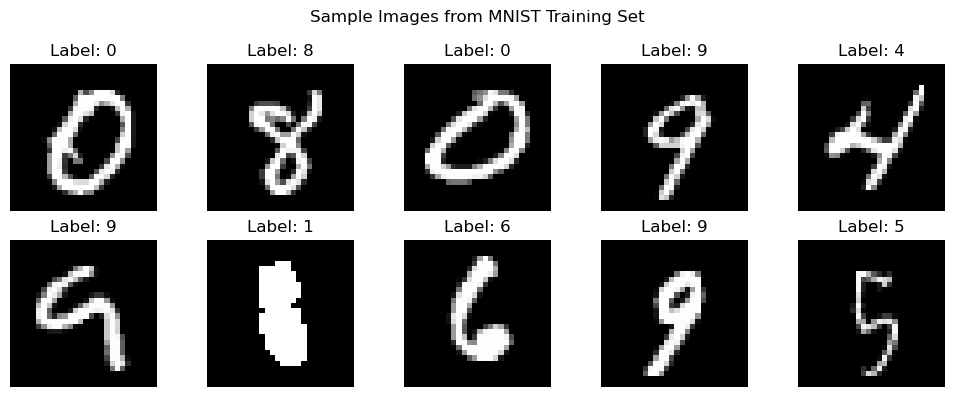

In [ ]:
import matplotlib.pyplot as plt

# Plot 10 random images from training set
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Training Set")
plt.tight_layout()
plt.show()

In [ ]:
def build_model(reg_type=None):
    if reg_type == 'l1':
        regularizer = regularizers.l1(0.001)
    elif reg_type == 'l2':
        regularizer = regularizers.l2(0.001)
    elif reg_type == 'l1_l2':
        regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)
    else:
        regularizer = None

    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Select regularization type: 'l1', 'l2', 'l1_l2', or None
reg_type = 'l2'

model = build_model(reg_type=reg_type)

# Use early stopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy with {reg_type.upper()} Regularization: {test_acc:.4f}")

C:\Users\SUBHANUDDIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8914 - loss: 0.5781 - val_accuracy: 0.9417 - val_loss: 0.3668
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9496 - loss: 0.3274 - val_accuracy: 0.9522 - val_loss: 0.3083
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9606 - loss: 0.2707 - val_accuracy: 0.9610 - val_loss: 0.2568
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9674 - loss: 0.2369 - val_accuracy: 0.9672 - val_loss: 0.2289
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9707 - loss: 0.2147 - val_accuracy: 0.9685 - val_loss: 0.2196
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9740 - loss: 0.1997 - val_accuracy: 0.9714 - val_loss: 0.2040
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9750 - loss: 0.1865 - val_accuracy: 0.9658 - val_loss: 0.2087
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9765 - loss: 0.1790 - val_a

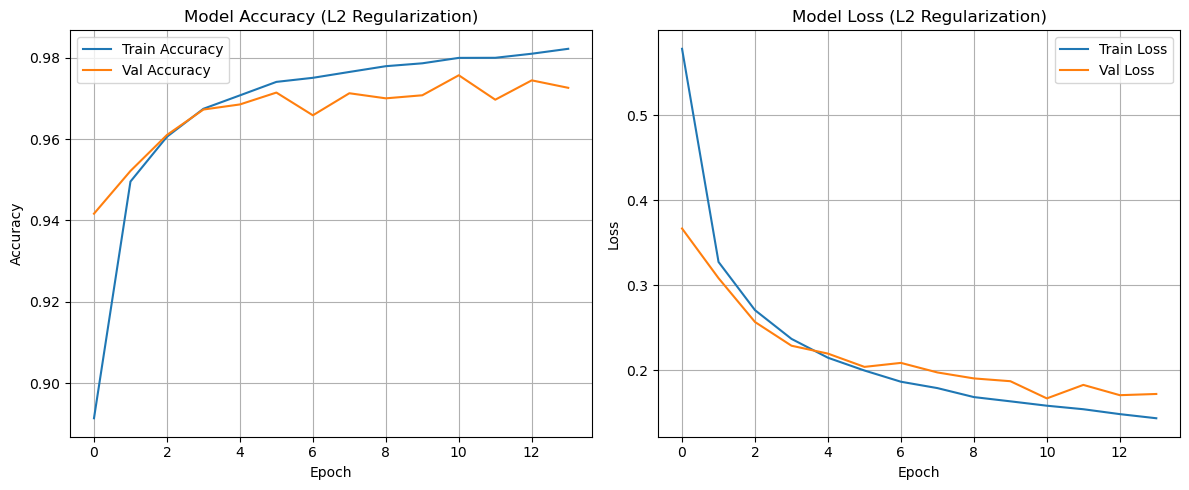

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title(f"Model Accuracy ({reg_type.upper()} Regularization)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f"Model Loss ({reg_type.upper()} Regularization)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


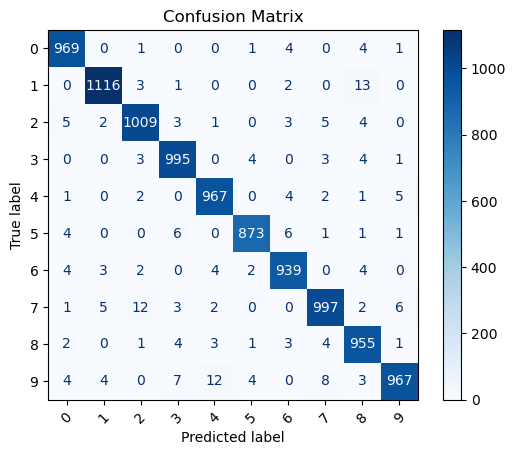

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9788    0.9888    0.9838       980
           1     0.9876    0.9833    0.9854      1135
           2     0.9768    0.9777    0.9772      1032
           3     0.9764    0.9851    0.9808      1010
           4     0.9778    0.9847    0.9812       982
           5     0.9864    0.9787    0.9826       892
           6     0.9771    0.9802    0.9786       958
           7     0.9775    0.9698    0.9736      1028
           8     0.9637    0.9805    0.9720       974
           9     0.9847    0.9584    0.9714      1009

    accuracy                         0.9787     10000
   macro avg     0.9787    0.9787    0.9787     10000
weighted avg     0.9788    0.9787    0.9787     10000

